In [1]:
from read_input import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
set_scenario_files("scenarioMAX", "setCAPS")

sns.set(font_scale=2)
keyslots = get_keyslots()
characters = get_characters()

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
performance = pd.read_csv("input/performance/performance_daryl_cleaned.csv", sep=" ", names={"key1", "key2", "time"})
performance = performance[["key1", "key2", "time"]]
p_single, p_bigram = get_probabilities({"formal":0.5, "twitter":0.3, "code":0.2})
p_single_df = pd.DataFrame(columns={"letter", "f"})
p_single_df.loc[:,"letter"] = [l for l, f in p_single.iteritems()]
p_single_df.loc[:,"f"] = [f for l, f in p_single.iteritems()]

p_bigram_df = pd.DataFrame(columns={"letter1", "letter2", "f"})
p_bigram_df.loc[:,"letter1"] = [l1 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"letter2"] = [l2 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"f"] = [f for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df = p_bigram_df[["letter1", "letter2", "f"]]
p_bigram_df = p_bigram_df[(p_bigram_df.letter1.isin(characters)) | (p_bigram_df.letter2.isin(characters))]

weighting corpora
weighting corpora
weighting corpora


In [3]:

def group(key1,key2=""):
    keyslots=get_keyslots()
    if key1 in keyslots:
        parts =  key1.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
    else:
        parts =  key2.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
        
performance.loc[:,"Group"] = performance.apply(lambda row: group(row.key1, row.key2), axis=1)
performance.loc[:,"Fst"] = performance.key1.apply(lambda x: x in keyslots)

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


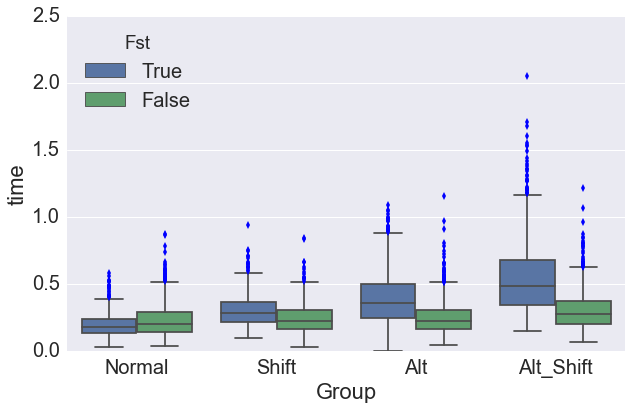

In [4]:
fig,ax = plt.subplots(1)
fig.set_size_inches(10,6)
sns.boxplot(x = "Group", y="time", hue="Fst", data = performance, ax=ax)

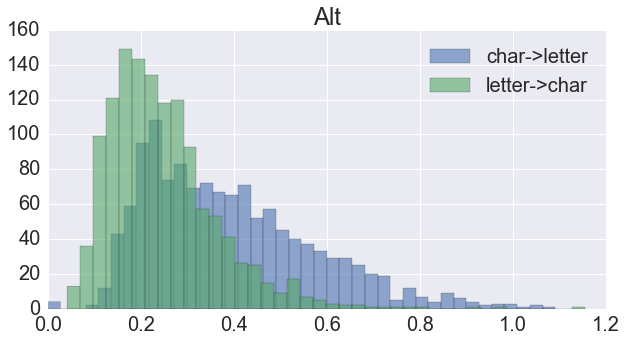

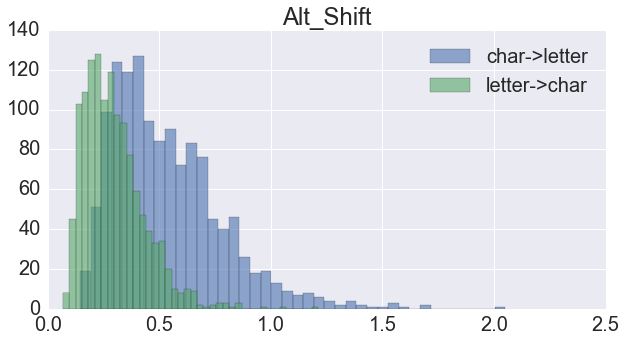

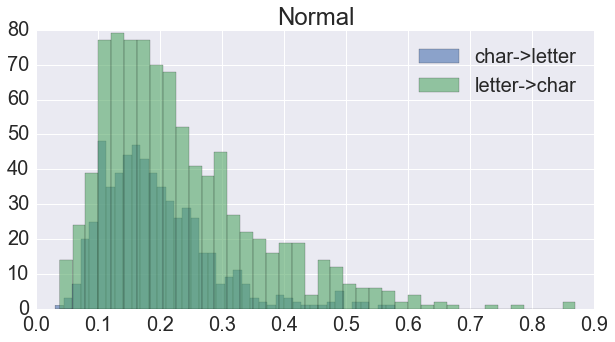

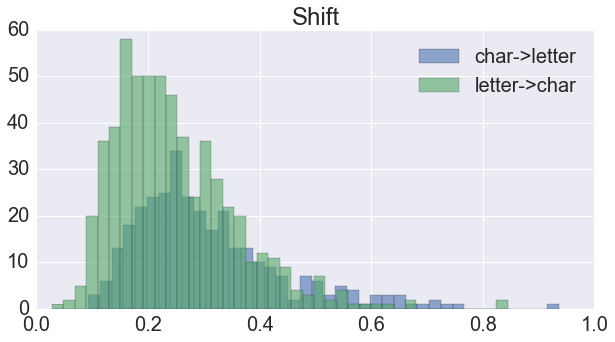

In [5]:

#plt.legend(["Normal", "Shift", "Alt", "Alt_Shift"])
#df = performance[performance.Fst==False]
for g, g_data in performance.groupby('Group'):
    fig,ax = plt.subplots(1)
    fig.set_size_inches(10,5)
    g_data[g_data.Fst==True].time.hist(bins=40,ax=ax,alpha=0.6)
    g_data[g_data.Fst==False].time.hist(bins=40,ax=ax,alpha=0.6)
    ax.legend(["char->letter", "letter->char"])
    #ax.set_xlim(0,4.0)
    plt.title(g)


In [9]:
performance.sort_values(by="time")

,key1,key2,time
2078,E12_Alt,C04,0.000000
6608,B04_Alt,C01,0.000000
1646,E04_Alt,C04,0.000000
6948,B10_Alt,C09,0.000000
4611,C01,C12_Shift,0.027967
6084,B09,C09,0.030008
6055,D04,B09,0.037511
4449,C01,C12,0.038622
4356,C10,C09,0.039033
351,C04,E06,0.040202


In [15]:
p_bigram["e", "t"]

0.0062731120214285846

In [5]:
p_bigram_df.sort_values(by="f", ascending=False)

,letter1,letter2,f
29293,",",space,0.008684
31772,.,space,0.003231
30137,à,space,0.003230
18698,t,é,0.003112
11138,é,space,0.003109
19012,r,é,0.003052
7191,space,à,0.002963
1212,l,',0.002788
11491,d,',0.002207
27176,é,e,0.002116


In [27]:
p_single_df[["letter", "f"]].sort_values(by="f", ascending=False)

,letter,f
51,space,1.640729e-01
173,e,1.097858e-01
86,s,6.139422e-02
175,i,5.758391e-02
170,a,5.744307e-02
125,n,5.720767e-02
41,t,5.457825e-02
126,r,5.238215e-02
83,o,4.499570e-02
179,u,4.184009e-02


In [18]:
new_p_single_df = pd.DataFrame(columns={"letter", "f"})
for l in p_single.keys():
    new_p_single_df.loc[len(new_p_single_df), :] = [l,p_bigram_df[(p_bigram_df.letter2==l) & (p_bigram_df.letter1.isin(get_letters()))].f.sum()]
new_p_single_df[["letter", "f"]].sort_values(by="f", ascending=False)    

,letter,f
122,é,0.0113049
101,.,0.0085316
10,",",0.00585853
143,:,0.00545635
50,',0.00488658
8,(,0.00360125
146,-,0.00331727
55,/,0.00303899
47,#,0.00278591
75,à,0.00221598


In [16]:
P=0
c = u":"
s = "D01_Alt"
for l in get_letters():
    print "(%s, %s):%f"%(l,c,p_bigram[(l,c)]) 
    P += p_bigram[(l,c)]
print P

(a, :):0.000001
(b, :):0.000000
(c, :):0.000001
(d, :):0.000001
(e, :):0.000038
(f, :):0.000000
(g, :):0.000000
(h, :):0.000000
(i, :):0.000002
(j, :):0.000000
(k, :):0.000000
(l, :):0.000003
(m, :):0.000000
(n, :):0.000009
(o, :):0.000001
(p, :):0.000015
(q, :):0.000000
(r, :):0.000008
(s, :):0.000027
(space, :):0.001093
(t, :):0.000015
(u, :):0.000002
(v, :):0.000000
(w, :):0.000000
(x, :):0.000002
(y, :):0.000000
(z, :):0.000000
0.00122120387066
